## 1차원 데이터
- 평균값(기댓값), 표본분산, 불편분산(ddof=1), 표준편차
- 표본분산은 표본의 평균을 사용해서 분산을 계산한 값으로 분산을 과소 추정하는 경향이 있으며 그 경향을 없애기 위한 것이 불편분산임. 표본분산보다 조금 큰 값이 된다.
- 표준화 :  평균값이 큰 변수와 작은 변수가 섞여 있으면 다루기 어려우므로 표준화로 데이터를 비교하기 쉽게 한다.
- 최댓값, 최솟값, 중앙값, 사분위수
- 표본분산과 비편향분산
 - 분산은 표본 분산과 불편 분산(unviased variance)의 두 종류가 존재
 - 표본 분산은 표본에서 계산된 분산이며 모집단에 비해 표본수가 적을 떄는 표본 분산이 모분산보다 작아진다.
 - 즉 표본 분산이 모집단 분산에 맞춰서 동일하게 보정한 것을 비편향 분산이라 한다.
 - 통계학에서는 이 비편향분산을 사용하는 경우가 많다.
 - 불편분산은 n대신 n-1로 나누어 구할 수 있다.

[표본분산이 분산을 과소평가하는 이유] 
 - 호수 안에 물고기가 7마리가 있다. 몸길이 {1,2,3,4,5,6,7}, 모평균 4, 샘플링 3마리{1,2,3} 표본평균 2,샘플링2{5,6,7} 표본평균 6
 - 이때 분산은 모평균을 모르기때문에 표본평균과의 거리를 계산하여 분산을 과소평가 하게된다.
 - 표본 분산보다 조금 더 큰 값이 되도록 보정하기 위하여 N대신 N-1로 나누어 불편분산을 구할 수 있다.

In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('data/ch2_scores_em.csv')
df.head()

,student number,english,mathematics
0,1,42,65
1,2,69,80
2,3,56,63
3,4,41,63
4,5,57,76


In [2]:
scores = np.array(df.english)[:10]
scores

array([42, 69, 56, 41, 57, 48, 65, 49, 65, 58], dtype=int64)

In [3]:
score_df = pd.DataFrame({'score':scores},
                       index = pd.Index(['A','B','C','D','E','F','G','H','I','J'],name='student'))
score_df

,score
student,
A,42
B,69
C,56
D,41
E,57
F,48
G,65
H,49
I,65


In [4]:
#평균값
print(scores.mean())
print(np.mean(scores))
sum(scores)/len(scores)

55.0
55.0


55.0

In [5]:
#중앙값
sorted_scores = np.sort(scores)
sorted_scores

array([41, 42, 48, 49, 56, 57, 58, 65, 65, 69], dtype=int64)

In [6]:
n = len(sorted_scores)
if n % 2 ==0:
    m0 = sorted_scores[n//2 -1]
    m1 = sorted_scores[n//2]
    median = (m0 +m1) / 2
else:
    median = sorted_scores[(n+1)//2 -1]
median

56.5

In [7]:
print(np.median(scores))
score_df.median()

56.5


score    56.5
dtype: float64

In [8]:
# 최빈값
pd.Series([1,1,1,2,2,3]).mode()

0    1
dtype: int64

In [9]:
# 분산과 표준편차
scores

array([42, 69, 56, 41, 57, 48, 65, 49, 65, 58], dtype=int64)

In [10]:
#편차
mean = np.mean(scores)
print(mean)
deviation = scores - mean
deviation

55.0


array([-13.,  14.,   1., -14.,   2.,  -7.,  10.,  -6.,  10.,   3.])

In [11]:
np.mean(deviation)

0.0

In [12]:
# Q. 20개 원소로 구성되는 배열을 만든 후 평균, 편차 및 편차의 합을 구하세요.
np.random.seed(0)
a = np.random.randint(100,size = 20)
print(a,'\n')
print(a.mean(),'\n')
b = a - a.mean()
print(b,'\n')
print(np.sum(b))
np.mean(b ** 2)

[44 47 64 67 67  9 83 21 36 87 70 88 88 12 58 65 39 87 46 88] 

58.3 

[-14.3 -11.3   5.7   8.7   8.7 -49.3  24.7 -37.3 -22.3  28.7  11.7  29.7
  29.7 -46.3  -0.3   6.7 -19.3  28.7 -12.3  29.7] 

5.684341886080802e-14


629.41

분산
- Numpy와 Pandas는 서로 다른 분산을 기본으로 설정하여 계산
 * Numpy는 표본분산, Pandas는 불편분산
 * Pandas에서 표본분산을 계산하려면 var 메소드의 인수를 ddof = 0이라고 설정, 불편분산은 ddor = 1일 때 해당됨.

In [13]:
# 분산
np.mean(deviation ** 2)

86.0

In [14]:
np.var(scores)

86.0

In [15]:
score_df.var(ddof=0)

score    86.0
dtype: float64

In [16]:
df = score_df.copy()
df['deviation'] = deviation
df['square of deviation'] = np.square(deviation)
df

,score,deviation,square of deviation
student,,,
A,42,-13.0,169.0
B,69,14.0,196.0
C,56,1.0,1.0
D,41,-14.0,196.0
E,57,2.0,4.0
F,48,-7.0,49.0
G,65,10.0,100.0
H,49,-6.0,36.0
I,65,10.0,100.0


In [17]:
df.mean()

score                  55.0
deviation               0.0
square of deviation    86.0
dtype: float64

In [18]:
# 표준편차
np.sqrt(np.var(scores,ddof=0))

9.273618495495704

In [19]:
np.std(scores)

9.273618495495704

In [20]:
df.std(ddof=0)

score                   9.273618
deviation               9.273618
square of deviation    74.315543
dtype: float64

In [21]:
# 범위와 4분위수 범위
np.max(scores) - np.min(scores)

28

In [22]:
scores_Q1 = np.percentile(scores,25)
scores_Q3 = np.percentile(scores,75)
scores_IQR = scores_Q3 - scores_Q1
scores_IQR

15.0

In [23]:
# 요약 통계표
pd.Series(scores).describe()

count    10.000000
mean     55.000000
std       9.775252
min      41.000000
25%      48.250000
50%      56.500000
75%      63.250000
max      69.000000
dtype: float64

In [24]:
#데이터의 정규화
display(f'평균 : {scores.mean()}, 표준편차 : {scores.std().round(4)}')

'평균 : 55.0, 표준편차 : 9.2736'

In [25]:
# 표준화
z = (scores - np.mean(scores)) / np.std(scores)
z

array([-1.40182605,  1.50965882,  0.10783277, -1.50965882,  0.21566555,
       -0.75482941,  1.07832773, -0.64699664,  1.07832773,  0.32349832])

In [26]:
np.mean(z),np.std(z)

(-1.6653345369377347e-17, 0.9999999999999999)

In [27]:
z = 50 + 10 * (scores - np.mean(scores)) / np.std(scores)
z

array([35.98173948, 65.09658825, 51.07832773, 34.90341175, 52.15665546,
       42.45170588, 60.78327732, 43.53003361, 60.78327732, 53.2349832 ])

In [28]:
score_df['deviation_value'] = z

In [29]:
score_df

,score,deviation_value
student,,
A,42,35.981739
B,69,65.096588
C,56,51.078328
D,41,34.903412
E,57,52.156655
F,48,42.451706
G,65,60.783277
H,49,43.530034
I,65,60.783277


In [30]:
df = pd.read_csv('data/ch2_scores_em.csv')
eng_scores = np.array(df.english)
pd.Series(eng_scores).describe()

count    50.000000
mean     58.380000
std       9.799813
min      37.000000
25%      54.000000
50%      57.500000
75%      65.000000
max      79.000000
dtype: float64

In [31]:
freq, _ = np.histogram(eng_scores, bins=10,range=(0,100))
freq

array([ 0,  0,  0,  2,  8, 16, 18,  6,  0,  0], dtype=int64)

In [32]:
freq_class = [f'{i}~{i+10}'for i in range(0,100,10)]
freq_dist_df = pd.DataFrame({'frequency':freq},
                           index = pd.Index(freq_class,
                                           name='class'))
freq_dist_df

,frequency
class,
0~10,0
10~20,0
20~30,0
30~40,2
40~50,8
50~60,16
60~70,18
70~80,6
80~90,0


In [33]:
#  계급값  : 각 계급을 대표하는 값으로 계급의 중앙값이 이용됨
class_value = [(i+(i+10))//2 for i in range(0,100,10)]
class_value

[5, 15, 25, 35, 45, 55, 65, 75, 85, 95]

In [34]:
#상대도수 : 해당 계급의 데이터의 상대적인 비율
rel_freq = freq / freq.sum()
print(rel_freq)
rel_freq.sum()

[0.   0.   0.   0.04 0.16 0.32 0.36 0.12 0.   0.  ]


1.0

In [35]:
#누적상대도수 :  해당 계급까지의 상대도수 합
cum_rel_freq = np.cumsum(rel_freq)
cum_rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.2 , 0.52, 0.88, 1.  , 1.  , 1.  ])

In [36]:
freq_dist_df['class value'] = class_value
freq_dist_df['relative frequency'] = rel_freq
freq_dist_df['cumulative relative frequency'] = cum_rel_freq
freq_dist_df

,frequency,class value,relative frequency,cumulative relative frequency
class,,,,
0~10,0,5,0.00,0.00
10~20,0,15,0.00,0.00
20~30,0,25,0.00,0.00
30~40,2,35,0.04,0.04
40~50,8,45,0.16,0.20
50~60,16,55,0.32,0.52
60~70,18,65,0.36,0.88
70~80,6,75,0.12,1.00
80~90,0,85,0.00,1.00


In [37]:
# 최빈값
freq_dist_df.loc[freq_dist_df['frequency'].idxmax(),'class value']

65

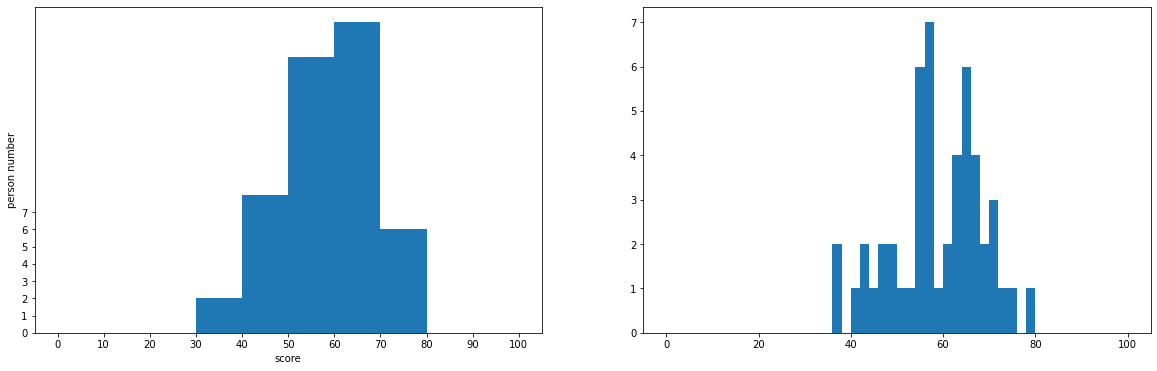

In [38]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,6))
ax = fig.add_subplot(121)
ax1 = fig.add_subplot(122)
freq, _, _ = ax.hist(eng_scores, bins = 10, range=(0,100))
freq, _, _ = ax1.hist(eng_scores, bins = 50, range=(0,100))
ax.set_xlabel('score')
ax.set_ylabel('person number')
ax.set_xticks(np.linspace(0,100,10+1))
ax.set_yticks(np.arange(0,freq.max()+1))
plt.show()
plt.close()

In [39]:
ax.hist(eng_scores, bins = 10, range=(0,100))

(array([ 0.,  0.,  0.,  2.,  8., 16., 18.,  6.,  0.,  0.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <BarContainer object of 10 artists>)

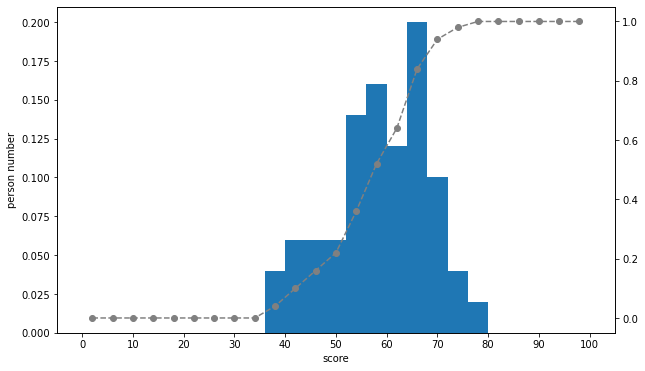

In [40]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(111)
# Y축의 스케일이 다른 그래프를 ax1과 동일한 영역에 생성
ax2 = ax1.twinx()
# 상대도수의 히스토그램으로 하기 위해서는 도수를 데이터의 수로 나눌 필요가 있음.
weights = np.ones_like(eng_scores) / len(eng_scores)
rel_freq, _, _ = ax1.hist(eng_scores, bins = 25, range=(0,100), weights = weights)

cum_rel_freq = np.cumsum(rel_freq)
class_value = [(i+(i+4))//2 for i in range(0,100,4)]

ax2.plot(class_value, cum_rel_freq, ls = '--',marker='o', color = 'gray')
ax2.grid(visible=False)
ax1.set_xlabel('score')
ax1.set_ylabel('person number')
ax1.set_xticks(np.linspace(0,100,10+1))

plt.show()
plt.close()

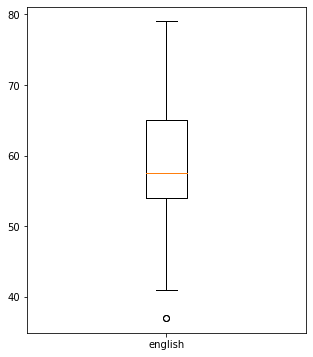

In [41]:
# 상자 그림
fig = plt.figure(figsize=(5,6))
ax = fig.add_subplot(111)
ax.boxplot(eng_scores, labels=['english'])
plt.show()
plt.close()

In [42]:
# 표본분산
data = np.array([2,3,3,4,4,4,4,5,5,6])
mu = np.sum(data)/len(data)
s = np.sum((data-mu)**2)/len(data)
s

1.2

In [43]:
# 불편분산
s1 = np.sum((data-mu)**2)/(len(data)-1)
s1

1.3333333333333333

## 2차원 데이터

In [44]:
df = pd.read_csv('data/ch2_scores_em.csv', index_col = 'student number')

en_scores = np.array(df.english)[:10]
ms_scores = np.array(df.mathematics)[:10]
sdf = pd.DataFrame({'english':en_scores,'mathematics':ms_scores},
                   index = pd.Index(['A','B','C','D','E','F','G','H','I','J'],name='student'))
sdf.head()

,english,mathematics
student,,
A,42,65
B,69,80
C,56,63
D,41,63
E,57,76


In [45]:
# 공분산
dfc = sdf.copy()
dfc['eng_deviation'] = dfc.english - dfc.english.mean()
dfc['math_deviation'] = dfc.mathematics - dfc.mathematics.mean()
dfc['product of deviation'] = dfc['eng_deviation'] * dfc['math_deviation']
dfc

,english,mathematics,eng_deviation,math_deviation,product of deviation
student,,,,,
A,42,65,-13.0,-6.4,83.2
B,69,80,14.0,8.6,120.4
C,56,63,1.0,-8.4,-8.4
D,41,63,-14.0,-8.4,117.6
E,57,76,2.0,4.6,9.2
F,48,60,-7.0,-11.4,79.8
G,65,81,10.0,9.6,96.0
H,49,66,-6.0,-5.4,32.4
I,65,78,10.0,6.6,66.0


In [46]:
dfc['product of deviation'].mean()

62.8

In [47]:
cov_mat = np.cov(en_scores,ms_scores, ddof = 0)
cov_mat

array([[86.  , 62.8 ],
       [62.8 , 68.44]])

In [48]:
np.var(en_scores,ddof=0), np.var(ms_scores,ddof=0)

(86.0, 68.44000000000001)

In [49]:
# 상관계수
np.cov(en_scores,ms_scores,ddof=0)[0,1]/(np.std(en_scores)*np.std(ms_scores))

0.8185692341186713

In [50]:
np.corrcoef(en_scores,ms_scores)

array([[1.        , 0.81856923],
       [0.81856923, 1.        ]])

In [51]:
dfc[['english','mathematics']].corr()

,english,mathematics
english,1.000000,0.818569
mathematics,0.818569,1.000000


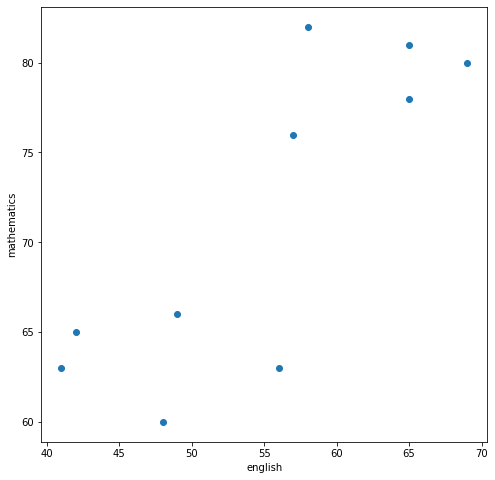

In [52]:
# 산점도
df2 = dfc[['english','mathematics']]
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
ax.scatter(df2.english,df2.mathematics)
ax.set_xlabel('english')
ax.set_ylabel('mathematics')
plt.show()
plt.close()

In [73]:
# [과제] 1변량 데이터 data = [2, 3, 3, 4, 4, 4, 4, 5, 5, 6]에 대하여 
# 평균, 불편분산, 표준편차, 최대, 최소, 4분위수, 중앙값을 구하세요.
#  단, 함수사용하는 경우와 사용하지 않는 경우를 모두 수행
data = [2, 3, 3, 4, 4, 4, 4, 5, 5, 6]
a = np.sum(data) / len(data)
print(a)
print(np.mean(data))
b = np.sum((data-a)**2) / (len(data)-1)
print(b)
print(np.var(data,ddof=1))
b1 = np.sqrt(np.sum((data-a)**2) / len(data))
print(b1)
print(np.std(data))
# def maxx(a10):
#     for a11 in a10:
#         if c == 0 | a11 <c :
#             return c
# c = maxx(data)
# print(c)
print(np.max(data))
# def minn(data):
#     d = o
#     for b11 in data:
#         if d == 0 | b11 > d :
#             return d
# print(d)
print(np.min(data))
print(np.percentile(data,25))
f = np.percentile(data,50)
print(f)
g = np.percentile(data,75)
print(g)
h = np.percentile(data,100)
print(h)
i = np.sort(data)
n = len(i)
if n % 2 ==0:
    m0 = i[n//2 -1]
    m1 = i[n//2]
    m = (m0 +m1) / 2
else:
    m = i[(n+1)//2 -1]
print(m)
print(np.median(data))

4.0
4.0
1.3333333333333333
1.3333333333333333
1.0954451150103321
1.0954451150103321
6
2
3.25
4.0
4.75
6.0
4.0
4.0


In [72]:
arr = np.random.randint(1,10, size=(7))
arr
#평균
arr.mean()
#표본분산
(arr-arr.mean())**2/(len(arr)-1)
#불편분산
(arr-arr.mean())**2/(len(arr))
#최대
arr.max()
#최소
arr.min()
#4분위수
arr_25 = np.percentile(arr,25)
arr_75 = np.percentile(arr,75)
IQR = arr_75-arr_25
IQR
#중앙값
if len(arr)%2 == 0:
    med_0 = arr[len(arr)//2-1]
    med_1 = arr[len(arr)//2]
    med = (med_0+med_1)/2
else:
    med = arr[(len(arr)+1)//2]
print(med)

def func(arr):
    if len(arr)%2 == 0:
        med_0 = arr[len(arr)//2-1]
        med_1 = arr[len(arr)//2]
        med = (med_0+med_1)/2
    else:
        med = arr[(len(arr)+1)//2]
    return med
print(func(arr))


4
4


In [78]:
# [과제] 10행 2열 2차원 배열을 생성하고 두열간의 공분산 및 상관계수를 구하세요.
#  단, numpy, pandas 두가지 방식으로 모두 수행
np.random.seed(0)
a = np.random.randint(100,size=(10,2))
display(a)
a1 = a[:,0]
a2 = a[:,1]
print(np.cov(a1,a2))
print(np.cov(a)[0][1])
print(np.cov(a[0],a[1]))
print(np.corrcoef(a)[0][1])
print(np.corrcoef(a[0],a[1]))
b = pd.DataFrame(a)
display(b)
print(b[0].cov(b[1]))
print(b[1].cov(b[0]))
print(b[0].corr(b[1]))
print(b[1].corr(b[0]))

array([[44, 47],
       [64, 67],
       [67,  9],
       [83, 21],
       [36, 87],
       [70, 88],
       [88, 12],
       [58, 65],
       [39, 87],
       [46, 88]])

[[ 327.61111111 -412.61111111]
 [-412.61111111 1067.87777778]]
4.5
[[4.5 4.5]
 [4.5 4.5]]
1.0
[[1. 1.]
 [1. 1.]]


,0,1
0,44,47
1,64,67
2,67,9
3,83,21
4,36,87
5,70,88
6,88,12
7,58,65
8,39,87
9,46,88


-412.61111111111103
-412.61111111111103
-0.6975909422558703
-0.6975909422558703


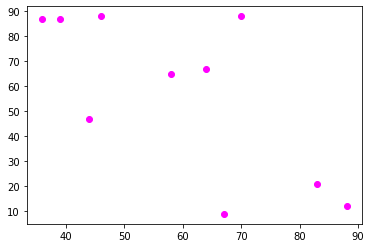

In [77]:
plt.scatter(b[0],b[1],color='magenta')

In [76]:
ary = np.random.randint(1,30,20).reshape(10,2)
np.random.seed(0)
display(ary)
# numpy 방식
a1 = ary[:,0]
a2 = ary[:,1]
co1 = np.cov(a1,a2).round(2)[0,1]
display(co1,
        np.corrcoef(a1,a2)[0,1].round(2))

# pandas 방식
ad = pd.DataFrame(ary)
display(ad.cov()[0][1].round(2),ad.corr()[0][1].round(2))

# 함수를 쓰지 않고서도 해보자
co2 = round(((a1-a1.mean())*((a2-a2.mean()))).sum()/(len(a1)-1),2)
coef2 = round(co2/(np.std(a1,ddof=1)*np.std(a2,ddof=1)),2)
display(co2, coef2)
# ddof 값 안 넣으면 표본분산으로 계산해서
# pandas 불편분산 쪽 값과는 다르게 나올 것임

# 공분산의 경우 불편분산으로 계산하기 때문에 편차제곱 평균 구할 때 n이 아니라 n-1로 나눠야 함


array([[13, 16],
       [22,  1],
       [ 4, 28],
       [ 4,  8],
       [10, 20],
       [22, 19],
       [ 5, 24],
       [ 7, 25],
       [25, 13],
       [27,  2]])

-55.82

-0.64

-55.82

-0.64

-55.82

-0.64

In [79]:
# [과제] 10행 2열 2차원 배열을 생성하고 두열간의 공분산 및 상관계수를 구하세요(단, numpy, pandas 두가지 방식으로 모두 수행)
arr = np.random.randint(0,100,20).reshape(10,2)
np.random.seed(0)
print(arr,'\n')
arr1 = arr[:,0]
arr2 = arr[:,1]
arr1_dev = arr1 - np.mean(arr1)
arr2_dev = arr2 - np.mean(arr2)
GBS = np.mean(arr1_dev*arr2_dev)
SGGS = np.cov(arr1,arr2,ddof=0)[0,1]/(np.std(arr1)*np.std(arr2))
print(f'공분산 : {GBS}')
print(f'상관계수 : {SGGS}')


[[81 37]
 [25 77]
 [72  9]
 [20 80]
 [69 79]
 [47 64]
 [82 99]
 [88 49]
 [29 19]
 [19 14]] 

공분산 : 83.96
상관계수 : 0.10438549122359814


다항곡선 회귀분석

기본문법 : p = polyfit(x,y,n)

https://qlsenddl-lab.tistory.com/48


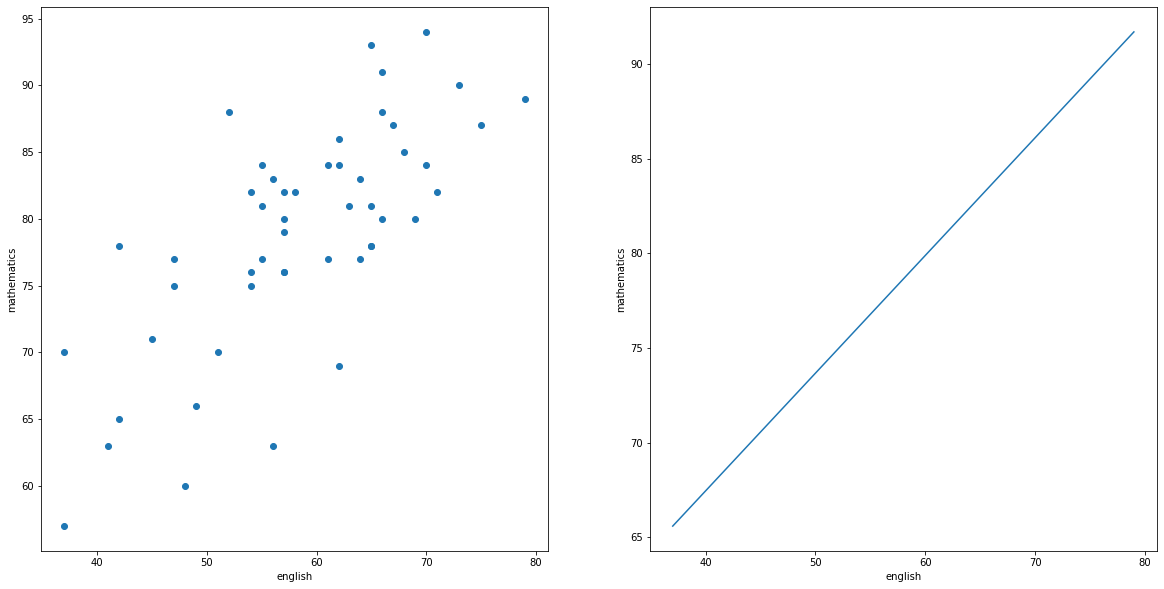

In [99]:
# 회귀직선
eng_scores = np.array(df['english'])
math_scores = np.array(df['mathematics'])
#계수 구하기
poly_fit = np.polyfit(eng_scores,math_scores,1)
poly_1d = np.poly1d(poly_fit)
xs = np.linspace(eng_scores.min(),eng_scores.max())
ys = poly_1d(xs)
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.scatter(eng_scores,math_scores)
ax2.plot(xs,ys)
ax1.set_xlabel('english')
ax1.set_ylabel('mathematics')
ax2.set_xlabel('english')
ax2.set_ylabel('mathematics')
plt.show()

<AxesSubplot:xlabel='english', ylabel='mathematics'>

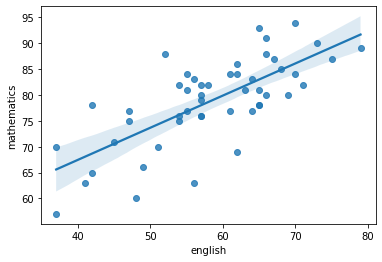

In [102]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.regplot('english','mathematics',df)


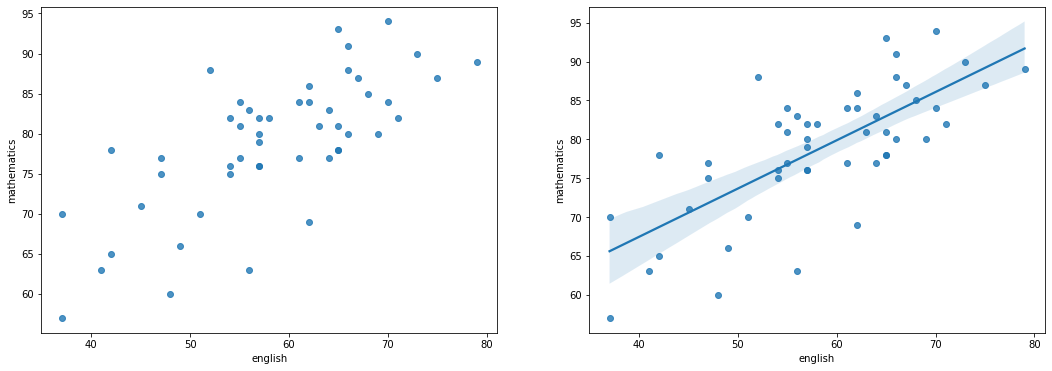

In [109]:
fig, axes = plt.subplots(1,2,figsize=(18,6),sharex=True)
sns.regplot(ax=axes[0], x = df.english, y = df.mathematics, fit_reg=False)
sns.regplot(ax=axes[1], x = df.english, y = df.mathematics)
plt.show()

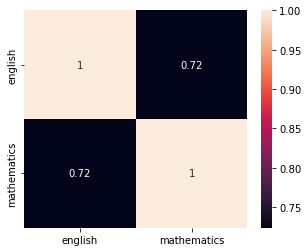

In [113]:
# Q. engilsh와 mathematics 두변수의 상관관계를 히트맵으로 표현하세요.
plt.figure(figsize=(5,4))
sns.heatmap(df.corr(),annot=True)
plt.show()
plt.close()


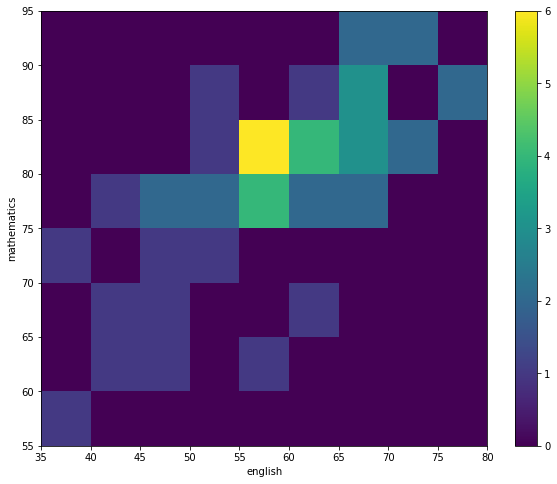

In [114]:
# hist2d 메소드로 히트맵 작성
fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(111)

c = ax.hist2d(eng_scores,math_scores,
             bins=[9,8], range = [(35,80),(55,95)])
# print(c)
ax.set_xlabel('english')
ax.set_ylabel('mathematics')
ax.set_xticks(c[1])
ax.set_yticks(c[2])
fig.colorbar(c[3],ax=ax)
plt.show()

In [120]:
anscombe_data = np.load('data/ch3_anscombe.npy')
print(anscombe_data.shape)
anscombe_data[0]

(4, 11, 2)


array([[10.  ,  8.04],
       [ 8.  ,  6.95],
       [13.  ,  7.58],
       [ 9.  ,  8.81],
       [11.  ,  8.33],
       [14.  ,  9.96],
       [ 6.  ,  7.24],
       [ 4.  ,  4.26],
       [12.  , 10.84],
       [ 7.  ,  4.82],
       [ 5.  ,  5.68]])

In [124]:
stats_df = pd.DataFrame(index = ['X_mean','X_variance','Y_mean','Y_variance','X&Y_correlation','X&Y_regression line'])
for i, data in enumerate(anscombe_data):
    dataX = data[:,0]
    dataY = data[:,1]
    poly_fit = np.polyfit(dataX,dataY,1)
    stats_df[f'data{i+1}'] = [f'{np.mean(dataX):.2f}',
                             f'{np.var(dataX):.2f}',
                             f'{np.mean(dataY):.2f}',
                             f'{np.var(dataY):.2f}',
                             f'{np.corrcoef(dataX,dataY)[0,1]:.2f}',
                             f'{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x']
stats_df

,data1,data2,data3,data4
X_mean,9.00,9.00,9.00,9.00
X_variance,10.00,10.00,10.00,10.00
Y_mean,7.50,7.50,7.50,7.50
Y_variance,3.75,3.75,3.75,3.75
X&Y_correlation,0.82,0.82,0.82,0.82
X&Y_regression line,3.00+0.50x,3.00+0.50x,3.00+0.50x,3.00+0.50x


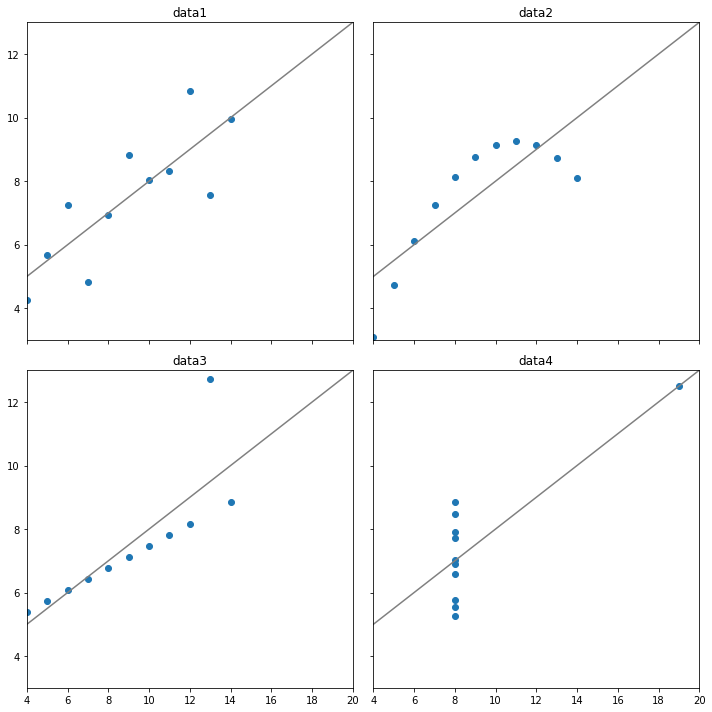

In [130]:
fig,axes = plt.subplots(nrows=2, ncols=2,figsize=(10,10),
                       sharex=True, sharey=True)
xs = np.linspace(0,30,100)
for i, data in enumerate(anscombe_data):
    poly_fit = np.polyfit(data[:,0],data[:,1],1)
    poly_1d = np.poly1d(poly_fit)
    ys = poly_1d(xs)
    ax = axes[i//2, i%2]
    ax.set_xlim([4,20])
    ax.set_ylim([3,13])
    ax.set_title(f'data{i+1}')
    ax.scatter(data[:,0],data[:,1])
    ax.plot(xs,ys,color = 'gray')
plt.tight_layout()
plt.show()

In [88]:
import pandas as pd
fdf = pd.read_csv('data/5_2_fm.csv')
fdf

,species,length
0,A,2
1,A,3
2,A,4
3,B,6
4,B,8
5,B,10


In [132]:
# # Q. species 그룹별 통계량을 구하세요
# display(fdf.groupby(['species']).mean())
# display(fdf.groupby(['species']).median())
display(fdf.groupby(['species']).agg(['sum','mean','median','max','min','count','var']))
display(fdf.groupby(['species']).describe())

length                               
           sum mean median max min count  var
species                                      
A            9  3.0    3.0   4   2     3  1.0
B           24  8.0    8.0  10   6     3  4.0

length                                    
         count mean  std  min  25%  50%  75%   max
species                                           
A          3.0  3.0  1.0  2.0  2.5  3.0  3.5   4.0
B          3.0  8.0  2.0  6.0  7.0  8.0  9.0  10.0

In [90]:
import pandas as pd
sdf = pd.read_csv('data/5_2_shoes.csv')
sdf

,store,color,sales
0,tokyo,blue,10
1,tokyo,red,15
2,osaka,blue,13
3,osaka,red,9


In [98]:
# Q. 각 store의 컬러별 판매량을 파악할 수 있는 피벗 테이블을 작성하세요.

In [135]:
pd.pivot_table(sdf,
              index = 'store',
                columns= 'color',
              values = 'sales',
              aggfunc='sum')

color,blue,red
store,,
osaka,13,9
tokyo,10,15


In [136]:
sdf.pivot_table(index=['store','color'],values='sales',aggfunc='sum')


sales
store color       
osaka blue      13
      red        9
tokyo blue      10
      red       15

In [89]:
import pandas as pd
cdf = pd.read_csv('data/4_cov.csv')
cdf

,x,y
0,18.5,34
1,18.7,39
2,19.1,41
3,19.7,38
4,21.5,45
5,21.7,41
6,21.8,52
7,22.0,44
8,23.4,44
9,23.8,49


In [137]:
#  Q. x,y의 공분산을 구하세요.

In [141]:
x_dev = cdf.x - cdf.x.mean()
y_dev = cdf.y - cdf.y.mean()
print((x_dev * y_dev).mean()) # 표준분산
print(np.cov(x_dev,y_dev,ddof=1)) # 불편분산

6.9060000000000015
[[ 3.64622222  7.67333333]
 [ 7.67333333 28.01111111]]


In [140]:
display(cdf.cov().iloc[0,1].round(2), cdf.corr().round(2))


7.67

,x,y
x,1.00,0.76
y,0.76,1.00


In [ ]:
# Q. 상관행렬을 구하세요.
display(cdf.cov().iloc[0,1].round(2), cdf.corr().round(2))
